In [1]:
import numpy as np
import pandas as pd

In [2]:
a1 = np.array([1, 2, 3,4])
a2 = np.array([1,2,3,4])
a1.dot(a2)

30

In [3]:
a1 = np.array([[1, 2, 3,4],[1, 2, 3,4],[1, 2, 3,4]])
a2 = np.array([1,2,3,4])
a1.dot(a2)

array([30, 30, 30])

# Perceptron Algorithm

* Positive label is represented as 1
* Negative label is represented as 0
* Target label is represented as $ y $ of size $n X 1$, where $n$ is the number of training examples
* Input variables is represented by a matrix of size $ n X m $, where $ n $ is the number of rows/examples, and $m$ is the number of input variables
* Weights matrix is represented as $W$ (of size $mX1$), where each variable's corresponding weight is represented as $w_i$
* $b$ represents the bias unit

## Algorithm

$$w_i = w_i + \Delta w_i$$
$$b = b + \Delta b$$

$$\Delta w_i = \eta(y^{(j)} - \hat y^{(j)}).x_i^{(j)}$$
$$\Delta b = \eta(y^{(j)} - \hat y^{(j)})$$
Where: $$\eta = \text{Learning Rate}$$
$$y^{(j)} = j^{th} \text{ training instance}$$
$$\hat y^{(j)}) = \text{predicted } j^{th} \text{ training instance's label}$$

**Prediction**
$$z^{(j)} = W^T . X + b$$
$$z^{(j)} \ge 0 \text{ Then } \hat y^{(j)} = 1 \text{ , else }\hat y^{(j)} = 0$$

Observe the following:
* For each training instance, all weights are adjusted
* The prediction is NOT made until all the weights are adjusted

## Example
Assume that we have the following data

In [11]:
x1 = [3,4,3,4,5,1.5,1.5,2,3,2]
x2 = [1,1,2,3,4,2,4,4,4.5,5]
y = [1,1,1,1,1,0,0,0,0,0]
data = pd.DataFrame({'x1':x1,'x2':x2, 'y': y})
data

,x1,x2,y
0,3.0,1.0,1
1,4.0,1.0,1
2,3.0,2.0,1
3,4.0,3.0,1
4,5.0,4.0,1
5,1.5,2.0,0
6,1.5,4.0,0
7,2.0,4.0,0
8,3.0,4.5,0
9,2.0,5.0,0


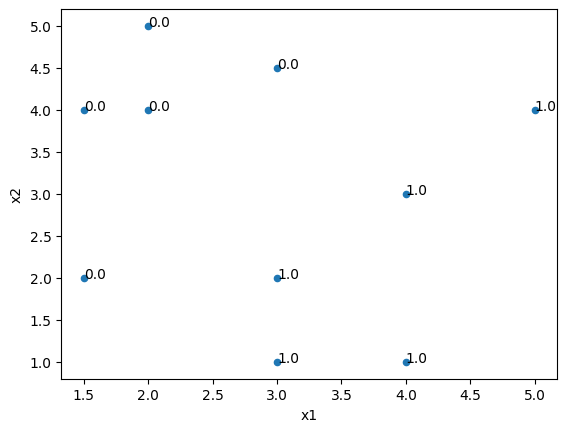

In [16]:
ax = data.plot.scatter(x='x1',y='x2')
data[['x1','x2','y']].apply(lambda row: ax.text(*row),axis=1);

In [190]:
# Algorithm implementation

class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        # INITIALIZE WEIGHTS TO RANDOM VALUES FROM STD NORMAL DIST (mean 0, and variance=0.01)
        # rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # self.b_ = np.float64(0) # weight initialized to 0
        # Comment/uncomment the code to check how the model changes.
        # Initialize the weights to 0
        self.w_ = np.zeros(X.shape[1])
        self.b_ = np.float64(0)
        # Initialize the weights to 1 and 2; bias to 1
        # self.w_ = np.array([1.0,2.0])
        # self.b_ = np.float64(1.0)
        # Initialize the weights to 10, 20; bias to 10. This will never converge (in 50 epochs)
        # self.w_ = np.array([10.0,20.0])
        # self.b_ = np.float64(10.0)
        self.errors_ = []
        # example: w: [ 0.01624345 -0.00611756]
        # b: 0.0
        print("Initial Values for weigths and bias:")
        print(f"w: {self.w_}")
        print(f"b: {self.b_}")

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X.values, y):
                # print(xi)
                # print(target)
                # print(f"eta: {self.eta}")
                # print(f"xi: {xi}")
                # print(f"predict: {self.predict(xi)}")
                # print(f"target: {target}")
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print(f"Weights: {self.w_}, bias: {self.b_}")
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

        

In [215]:
p = Perceptron(random_state=100, eta = 20)
p.fit(data[['x1','x2']], data['y'])

Initial Values for weigths and bias:
w: [0. 0.]
b: 0.0
Weights: [-30. -40.], bias: -20.0
Weights: [  0. -60.], bias: -20.0
Weights: [ 30. -80.], bias: -20.0
Weights: [  60. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90. -100.], bias: -20.0
Weights: [  90.

In [216]:
p.w_

array([  90., -100.])

In [217]:
p.b_

np.float64(-20.0)

In [218]:
print(p.errors_)

[1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [219]:
p.predict(data[['x1','x2']].values)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [220]:
p.w_

array([  90., -100.])

In [221]:
x1 = range(0,6)
x2 = [(p.w_[0] * x + p.b_)/(-p.w_[1]) for x in x1]

In [222]:
x1

range(0, 6)

In [223]:
x2

[np.float64(-0.2),
 np.float64(0.7),
 np.float64(1.6),
 np.float64(2.5),
 np.float64(3.4),
 np.float64(4.3)]

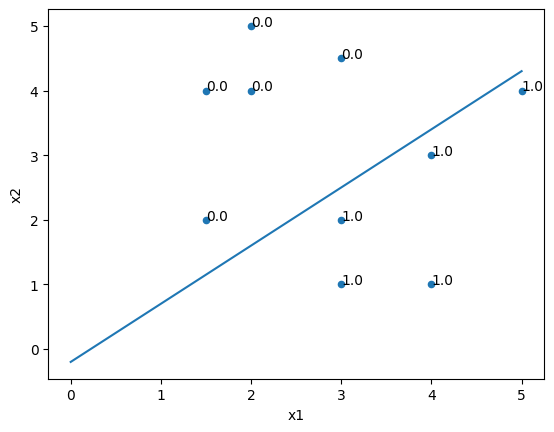

In [224]:
ax = data.plot.scatter(x='x1',y='x2')
data[['x1','x2','y']].apply(lambda row: ax.text(*row),axis=1)
ax.plot(x1,x2)

In [16]:
# update weights
def update_weights(eta, X, labels, w1, w2, b):
    updates = 0
    for ((x1, x2), y) in zip(X, labels):
        z_cap = w1*x1+w2*x2+b
        if z_cap >= 0:
            y_cap = 1
        else:
            y_cap = 0
            
        update = eta * (y - y_cap) 
        if update != 0:
            updates += 1
        w1 = w1 + update * x1
        w2 = w2 + update * x2
        b = b + update
        print(f"{w1}x1 + {w2}x2 + {b}")
    return w1, w2, b, updates
        

In [80]:
X = [[1,4], [3,5]] 
labels = [0,1]
w1 = 0
w2 = 0 
b = 3
eta = 0.01

w1, w2, b, updates = update_weights(eta, X, labels, w1, w2, b)
while updates > 0:
    print(f"updates: {updates}")
    w1, w2, b, updates = update_weights(eta, X, labels, w1, w2, b)

-0.01x1 + -0.04x2 + 2.99
-0.01x1 + -0.04x2 + 2.99
updates: 1
-0.02x1 + -0.08x2 + 2.9800000000000004
-0.02x1 + -0.08x2 + 2.9800000000000004
updates: 1
-0.03x1 + -0.12x2 + 2.9700000000000006
-0.03x1 + -0.12x2 + 2.9700000000000006
updates: 1
-0.04x1 + -0.16x2 + 2.960000000000001
-0.04x1 + -0.16x2 + 2.960000000000001
updates: 1
-0.05x1 + -0.2x2 + 2.950000000000001
-0.05x1 + -0.2x2 + 2.950000000000001
updates: 1
-0.060000000000000005x1 + -0.24000000000000002x2 + 2.9400000000000013
-0.060000000000000005x1 + -0.24000000000000002x2 + 2.9400000000000013
updates: 1
-0.07x1 + -0.28x2 + 2.9300000000000015
-0.07x1 + -0.28x2 + 2.9300000000000015
updates: 1
-0.08x1 + -0.32x2 + 2.9200000000000017
-0.08x1 + -0.32x2 + 2.9200000000000017
updates: 1
-0.09x1 + -0.36x2 + 2.910000000000002
-0.09x1 + -0.36x2 + 2.910000000000002
updates: 1
-0.09999999999999999x1 + -0.39999999999999997x2 + 2.900000000000002
-0.09999999999999999x1 + -0.39999999999999997x2 + 2.900000000000002
updates: 1
-0.10999999999999999x1 + -

In [45]:
w1, w2, b, updates = update_weights(eta, X, labels, w1, w2, b)
print(w1, w2, b, updates)

-1x1 + -4x2 + -1
2x1 + 1x2 + 0
2 1 0 2


In [46]:
w1, w2, b, updates = update_weights(0.1, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.9x1 + 0.6x2 + -0.1
1.9x1 + 0.6x2 + -0.1
1.9 0.6 -0.1 1


In [47]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.89x1 + 0.5599999999999999x2 + -0.11
1.89x1 + 0.5599999999999999x2 + -0.11
1.89 0.5599999999999999 -0.11 1


In [48]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.88x1 + 0.5199999999999999x2 + -0.12
1.88x1 + 0.5199999999999999x2 + -0.12
1.88 0.5199999999999999 -0.12 1


In [49]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8699999999999999x1 + 0.4799999999999999x2 + -0.13
1.8699999999999999x1 + 0.4799999999999999x2 + -0.13
1.8699999999999999 0.4799999999999999 -0.13 1


In [50]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8599999999999999x1 + 0.43999999999999995x2 + -0.14
1.8599999999999999x1 + 0.43999999999999995x2 + -0.14
1.8599999999999999 0.43999999999999995 -0.14 1


In [51]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8499999999999999x1 + 0.39999999999999997x2 + -0.15000000000000002
1.8499999999999999x1 + 0.39999999999999997x2 + -0.15000000000000002
1.8499999999999999 0.39999999999999997 -0.15000000000000002 1


In [52]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8399999999999999x1 + 0.36x2 + -0.16000000000000003
1.8399999999999999x1 + 0.36x2 + -0.16000000000000003
1.8399999999999999 0.36 -0.16000000000000003 1


In [53]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8299999999999998x1 + 0.32x2 + -0.17000000000000004
1.8299999999999998x1 + 0.32x2 + -0.17000000000000004
1.8299999999999998 0.32 -0.17000000000000004 1


In [54]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8199999999999998x1 + 0.28x2 + -0.18000000000000005
1.8199999999999998x1 + 0.28x2 + -0.18000000000000005
1.8199999999999998 0.28 -0.18000000000000005 1


In [55]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.8099999999999998x1 + 0.24000000000000002x2 + -0.19000000000000006
1.8099999999999998x1 + 0.24000000000000002x2 + -0.19000000000000006
1.8099999999999998 0.24000000000000002 -0.19000000000000006 1


In [56]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7999999999999998x1 + 0.2x2 + -0.20000000000000007
1.7999999999999998x1 + 0.2x2 + -0.20000000000000007
1.7999999999999998 0.2 -0.20000000000000007 1


In [57]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7899999999999998x1 + 0.16x2 + -0.21000000000000008
1.7899999999999998x1 + 0.16x2 + -0.21000000000000008
1.7899999999999998 0.16 -0.21000000000000008 1


In [58]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7799999999999998x1 + 0.12x2 + -0.22000000000000008
1.7799999999999998x1 + 0.12x2 + -0.22000000000000008
1.7799999999999998 0.12 -0.22000000000000008 1


In [59]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7699999999999998x1 + 0.07999999999999999x2 + -0.2300000000000001
1.7699999999999998x1 + 0.07999999999999999x2 + -0.2300000000000001
1.7699999999999998 0.07999999999999999 -0.2300000000000001 1


In [60]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7599999999999998x1 + 0.03999999999999999x2 + -0.2400000000000001
1.7599999999999998x1 + 0.03999999999999999x2 + -0.2400000000000001
1.7599999999999998 0.03999999999999999 -0.2400000000000001 1


In [61]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7499999999999998x1 + -1.3877787807814457e-17x2 + -0.2500000000000001
1.7499999999999998x1 + -1.3877787807814457e-17x2 + -0.2500000000000001
1.7499999999999998 -1.3877787807814457e-17 -0.2500000000000001 1


In [62]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7399999999999998x1 + -0.040000000000000015x2 + -0.2600000000000001
1.7399999999999998x1 + -0.040000000000000015x2 + -0.2600000000000001
1.7399999999999998 -0.040000000000000015 -0.2600000000000001 1


In [63]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7299999999999998x1 + -0.08000000000000002x2 + -0.27000000000000013
1.7299999999999998x1 + -0.08000000000000002x2 + -0.27000000000000013
1.7299999999999998 -0.08000000000000002 -0.27000000000000013 1


In [64]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7199999999999998x1 + -0.12000000000000002x2 + -0.28000000000000014
1.7199999999999998x1 + -0.12000000000000002x2 + -0.28000000000000014
1.7199999999999998 -0.12000000000000002 -0.28000000000000014 1


In [65]:
w1, w2, b, updates = update_weights(0.01, [[1,4], [3,5]], [0,1], w1, w2, b)
print(w1, w2, b, updates)

1.7099999999999997x1 + -0.16000000000000003x2 + -0.29000000000000015
1.7099999999999997x1 + -0.16000000000000003x2 + -0.29000000000000015
1.7099999999999997 -0.16000000000000003 -0.29000000000000015 1
